## 1. Graph partition

In [35]:
# Install community and  python-louvain for louvain library
!pip install python-louvain community cdlib

  Obtaining dependency information for cdlib from https://files.pythonhosted.org/packages/c8/63/33f17b7da53502e29d9476b538b9ae5eb05c47d060800caa730f781a8e93/cdlib-0.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for demon from https://files.pythonhosted.org/packages/96/85/5f9146e3f8d7324d8741cd3bea9b99926d5ee75571b9610c661b1bbd06f5/demon-2.0.6-py3-none-any.whl.metadata
  Obtaining dependency information for nf1 from https://files.pythonhosted.org/packages/65/c2/2ae3034b0719d7f3a6faea2d99157b930c11647ab9d000bda58a563d89c8/nf1-0.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for pulp from https://files.pythonhosted.org/packages/09/d7/57e71e11108203039c895643368c0d1a99fe719a6a80184edf240c33d25f/PuLP-2.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for eva-lcd from https://files.pythonhosted.org/packages/ee/fe/7465ba3e9637eb155fb79c4ccdbe92b90284fd5f70971d4061f52098ec2f/eva_lcd-0.1.1-py3-none-any.whl.metadata
  Obtaining dependency info

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 17.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00a 0:00:01


### A partition of a graph is a separation of its nodes into disjoint groups. Consider the following graph:



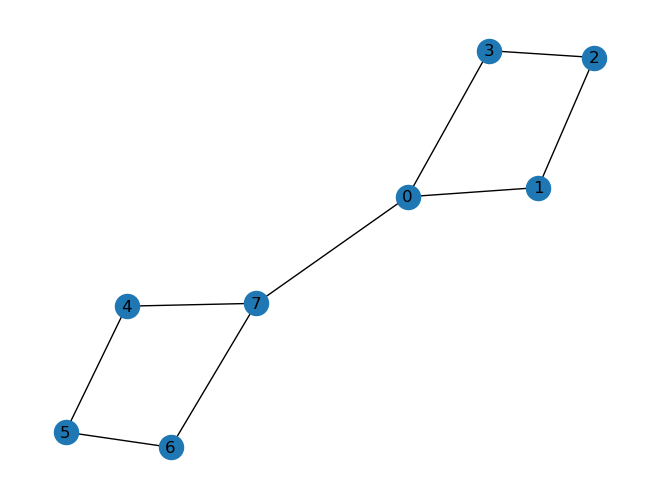

In [3]:
#Construct a graph
import networkx as nx
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

#draw the graph
nx.draw(G, with_labels=True)

In [4]:
#let's define a partition for the graph
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [5]:
#Check: Returns True if communities is a partition of the nodes of G.

nx.community.is_partition(G, partition)

True

In [6]:
#mapping nodes to the partition

partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

In [7]:
#check: two nodes in the same partition

partition_map[0] == partition_map[7]


True

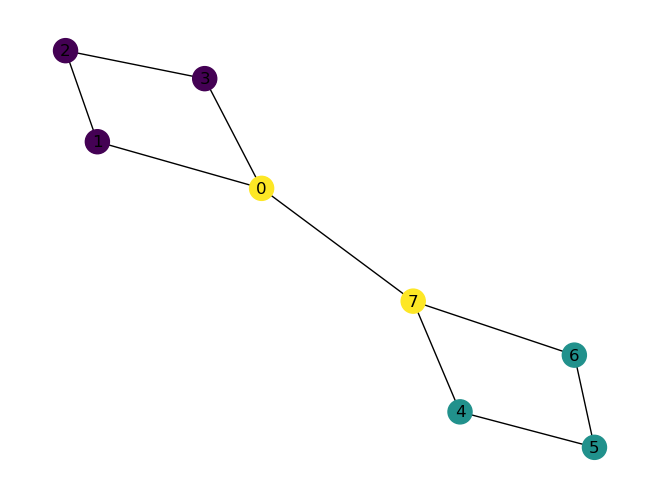

In [8]:
#color each partitions of the graph

node_colors = [partition_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)

## 2. Modularity

### In the Community library, the module modularity is a greedy modularity. Let's compare the manual Modularity with the library

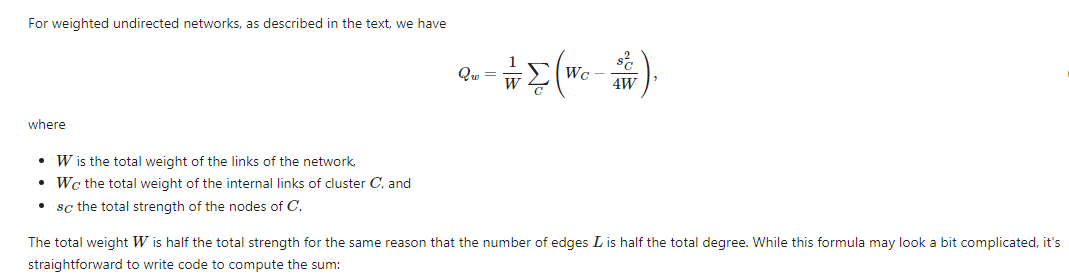

In [9]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [10]:
modularity(G, partition)

0.2222222222222222

### Let's compare this to a partition we would suspect to have higher modularity:



In [11]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, partition_2)

0.3888888888888889

### NetworkX function


In [12]:
nx.community.quality.modularity(G, partition_2)

0.38888888888888884

## 3. Finding cliques

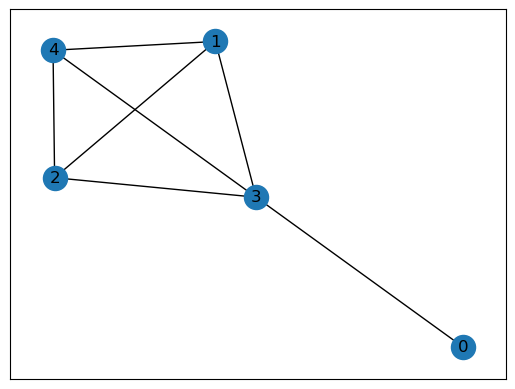

In [13]:
#construct a graph

import networkx as nx
G1 = nx.Graph()
edges = [(1, 2), (2, 3), (1, 3), (3, 4), (3, 0),(1, 4),(4, 2)]
G1.add_edges_from(edges)
nx.draw_networkx(G1)

In [14]:
#Finding all cliques in the graph
res = nx.find_cliques(G1)
cliques = [item for item in res]
cliques = sorted(cliques, key=lambda item: -len(item))
for item in cliques:
    print(item)

[3, 1, 2, 4]
[3, 0]


[4, 10, 12]

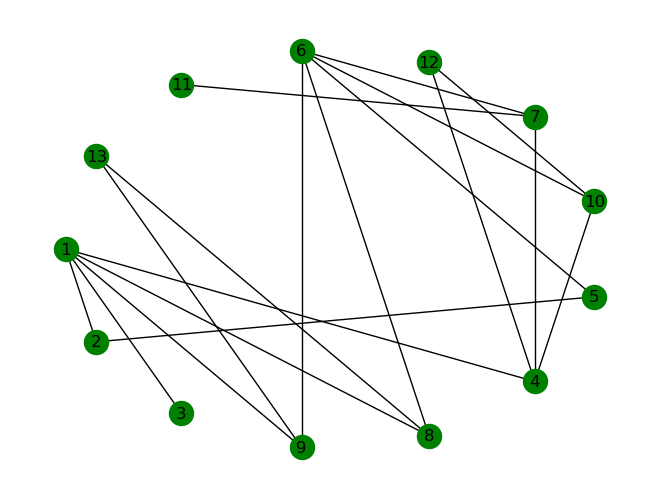

In [15]:
#Find a k-clique (3-clique)
from networkx.algorithms.community import k_clique_communities

G = nx.Graph()
edges = [(1, 2),(1,3), (1,9), (1,8), (1,4), (2,5),(4,10), (4, 7),
         (4,12),(5,6),(6,7),(6,8),(6,9),(6,10),(7,11),(8,13),(9,13),(10,12)]

G.add_edges_from(edges)
nx.draw(G, node_color="green", with_labels = True,pos=nx.shell_layout(G))
c = list(k_clique_communities(G, 3))
sorted(list(c[0]))

## 4. Louvain method

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import pandas as pd
import numpy as np
import math

# graph related library
import networkx as nx
from cdlib.algorithms import leiden

#finding the best partition in G using louvain method
import community.community_louvain as cl
partition = cl.best_partition(G)

In [37]:
# import libraries

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import math
import plotly.express as px
import pandas as pd
import numpy as np
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm

In [38]:
#Colouring the nodes in each partition

def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [39]:
# convert the python-louvain package output to NetworkX package community function output format
def get_louvain_communities(graph, random_state=1):
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    communities = [[] for i in range(len(unique_partition_labels))]
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities

In [40]:
# get communities using louvain algorithm
louvain_communities = get_louvain_communities(G, random_state=1)
louvain_communities

[[1, 2, 3, 5], [7, 11], [9, 8, 6, 13], [4, 10, 12]]

In [41]:
#Visualizing community

def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

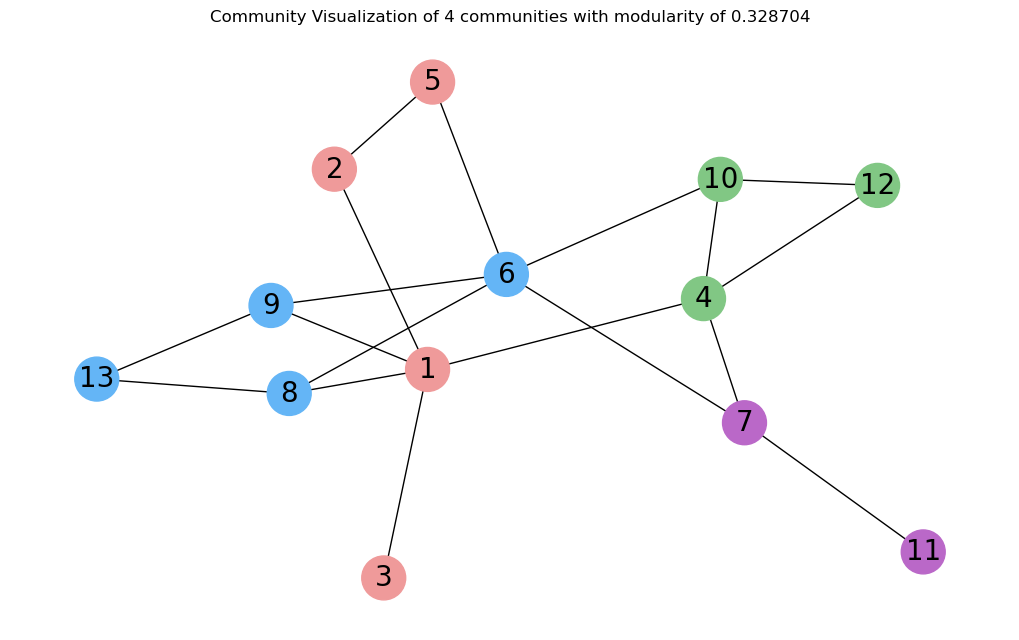

In [42]:
visualize_communities(G, louvain_communities)

## 5. Leiden method

In [53]:
# convert the leiden package output to NetworkX package community function output format and visualize
def get_visualize_leiden_communities(graph, random_state=1):
    leiden_communities = leiden(G).communities
    node_colors = create_community_node_colors(graph, leiden_communities)
    modularity = round(nx_comm.modularity(graph, leiden_communities), 6)
    print("Leiden communities",leiden_communities)
    title = f"Community Visualization of {len(leiden_communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

Leiden communities [[1, 2, 3, 5], [9, 8, 6, 13], [4, 10, 12], [7, 11]]


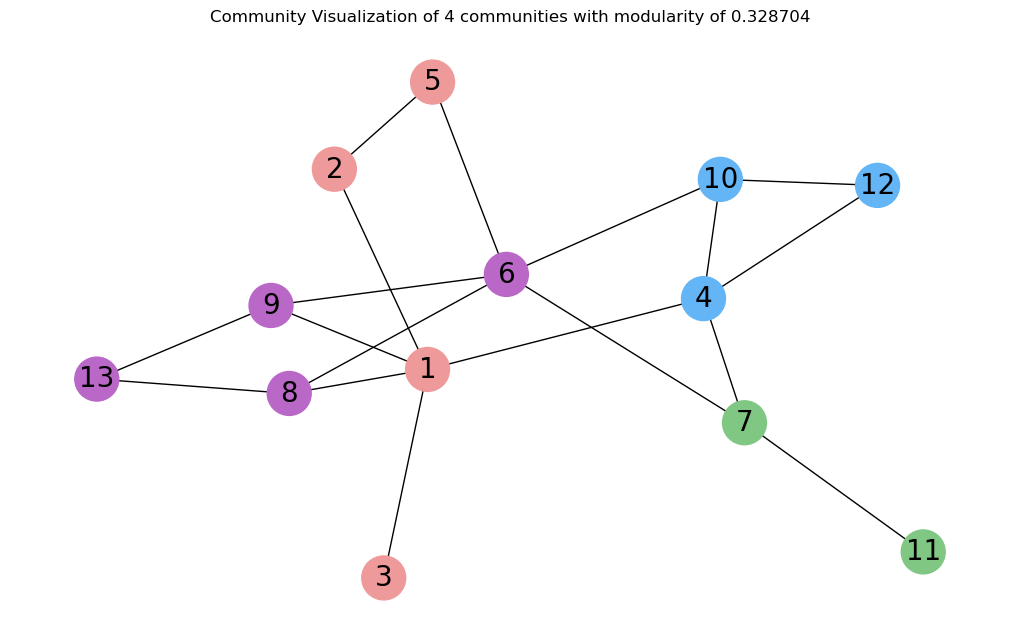

In [54]:
get_visualize_leiden_communities(G)